In [1]:
from Bio import SeqIO
import os

def join_Fasta(elegidos):
    """Une las secuencias que se encuentran en el directorio input_dir 
    y que se encuentren el la lista de los elegidos = [ ]. 
    Retorna en la secuencia total en el directorio output_dir"""
    
    input_dir = 'data_gen/fasta/' 
    output_dir = 'data_gen/Sec_Unidas.fasta'
    
    print('Procediendo a leer los ficheros de ', input_dir)
    records = []
    num_seq = -1
    for seq in os.listdir(input_dir):
        num_seq += 1 
        if num_seq in elegidos:
            fichero = open(input_dir + seq)
            record = SeqIO.read(fichero, 'fasta')
            records.append(record)
    SeqIO.write(records, output_dir, 'fasta')
    print('Se unido todas las secuencias fasta de {} en {}'.format(input_dir, output_dir))

In [2]:
elegidos = [1,2,5,9]
join_Fasta(elegidos)

Procediendo a leer los ficheros de  data_gen/fasta/
Se unido todas las secuencias fasta de data_gen/fasta/ en data_gen/Sec_Unidas.fasta


In [3]:
import os

def alinear_Secuencias(filename = 'Sec_Unidas.fasta'):
    dir_inicio='data_gen'
    dir_final = 'Clustal_Omega'
    salida_ali = 'Sec_Alineadas.clustal'
    print('Alineando las secuencias......')
    mover_archivo(dir_inicio, dir_final, filename)
    #Realizar el alineamiento
    comando = 'cd Clustal_Omega & clustalo.exe -i {} -o {} --outfmt=clu --force'.format(filename,salida_ali)
    os.system(comando)
    print('Se genero el archivo: {}'.format(salida_ali))

    mover_archivo(dir_final, dir_inicio, salida_ali)
    mover_archivo(dir_final, dir_inicio, filename)

#----------------------------------------------------------------------------

def mover_archivo(dir_inicio, dir_final, filename):
    comando = 'move {}\{} {}\{}'.format(dir_inicio,filename, dir_final, filename)
    os.system(comando)

In [4]:
alinear_Secuencias()

Alineando las secuencias......
Se genero el archivo: Sec_Alineadas.clustal


In [1]:
from Bio import AlignIO

def leer_SecAli(input_clustal = 'data_gen/Sec_Alineadas.clustal'):

    """ Recibe la direccion del archivo clutal con la secuencias aliendas 
        Retorna un objeto alineamiento"""
    
    aln = open(input_clustal, "r")
    # AlignIO para leer el archivo de alineamiento en formato 'clustal' format
    alignment = AlignIO.read(aln, "clustal")
    return alignment

In [2]:
aln = leer_SecAli()
print("\nLas secuencias alineadas son\n",aln)


Las secuencias alineadas son
 SingleLetterAlphabet() alignment with 12 rows and 527 columns
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT1
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT2
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...FPR PROT3
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...FPR PROT4
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...FPR PROT7
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT9
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT11
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...FPR PROT10
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...FPR PROT8
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT12
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT5
MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVT...--- PROT6


In [3]:
from Bio.Phylo.TreeConstruction import DistanceCalculator  # crear la matriz de distancias
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

calculator = DistanceCalculator('blosum62')
# añade la matriz de  distancias al objeto calculator y lo retorna
dm = calculator.get_distance(aln)
print(dm)

PROT1	0
PROT2	0.14046121593291405	0
PROT3	0.20674646354733406	0.20210409745293467	0
PROT4	0.2510245901639344	0.24856096284667717	0.0015408320493066618	0
PROT7	0.22700691121743755	0.21353880022014304	0.001598721023181482	0.0	0
PROT9	0.186726659167604	0.20210409745293467	0.0	0.02871046228710461	0.030086690464048993	0
PROT11	0.002207505518763808	0.05190311418685123	0.12221553281155928	0.16883852691218126	0.16883852691218126	0.09681449094316052	0
PROT10	0.18753541076487257	0.17076023391812867	0.008796481407437051	0.010391686650679466	0.010391686650679466	0.011536444677503921	0.131848284166165	0
PROT8	0.2145969498910676	0.21008869179600886	0.008477842003853597	0.01001540832049308	0.010391686650679466	0.010994502748625679	0.131848284166165	0.0	0
PROT12	0.2145969498910676	0.21008869179600886	0.035876475930971874	0.037675896504766215	0.03935514461830247	0.010994502748625679	0.131848284166165	0.027065527065527117	0.02590909090909088	0
PROT5	0.16598240469208214	0.17076023391812867	0.011536444677

In [4]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

def create_Tree(alignment, tipo = 'upgma'):
    """Se recibe de entrada el alimenamiento y el tipo de arbol nj o upgma 
    Genera ell arbol filogenetico 
    """
    print('Creando el arbol filogenetico ......')
    # 3. Creamos la matriz de distancias
    calculator = DistanceCalculator('identity')
    # añade la matriz de  distancias al objeto calculator y lo retorna
    dm = calculator.get_distance(alignment)

    #initialize a DistanceTreeConstructor object based on our distance calculator object
    constructor = DistanceTreeConstructor(calculator)

    #build the tree
    if tipo == 'upgma':
        tree = constructor.upgma(dm)
    if tipo == 'nj':
        tree = constructor.nj(dm)

    return tree

In [5]:
tree = create_Tree(aln)
print(tree)

Creando el arbol filogenetico ......
Tree(rooted=True)
    Clade(branch_length=0, name='Inner11')
        Clade(branch_length=0.1283206831119545, name='Inner10')
            Clade(branch_length=0.06359701138519926, name='Inner8')
                Clade(branch_length=0.05574003795066414, name='PROT12')
                Clade(branch_length=0.03913662239089184, name='Inner4')
                    Clade(branch_length=0.016603415559772294, name='PROT5')
                    Clade(branch_length=0.013757115749525595, name='Inner1')
                        Clade(branch_length=0.0028462998102466996, name='PROT6')
                        Clade(branch_length=0.0028462998102466996, name='PROT9')
            Clade(branch_length=0.1027336337760911, name='Inner7')
                Clade(branch_length=0.02680265654648955, name='Inner3')
                    Clade(branch_length=0.015180265654648972, name='PROT7')
                    Clade(branch_length=0.015180265654648972, name='PROT4')
                Clad

In [6]:
from Bio import Phylo
import pylab

def draw_Tree(tree):
    """ Muestra el arbol en pantalla"""
    Phylo.draw(tree)

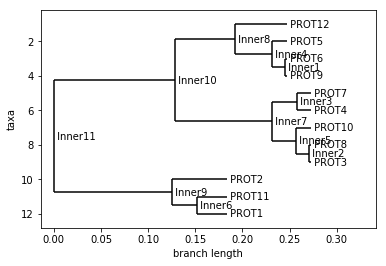

In [7]:
draw_Tree(tree)

In [8]:
tree = create_Tree(aln, 'nj')

Creando el arbol filogenetico ......


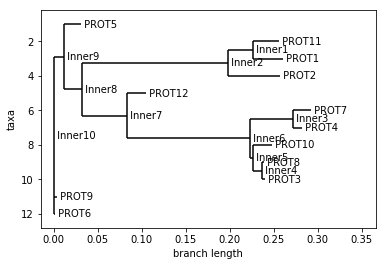

In [9]:
draw_Tree(tree)